<a href="https://colab.research.google.com/github/Mahammed400/Goruntu-isleme/blob/main/NLP_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np# Burada  veri analizinde,biliminde, dogal dil isleme kullanilan kutuphaneleri import ediyoruz ice aktyariyoruz
import re
import nltk
import pandas as pd
import nltk as nlp
import pickle
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
nltk.download('stopwords')
stopWords = set(stopwords.words('turkish'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#sonra cagirdigimiz dosyayi zip olarak aciyoruz dosya başarıyla çıkarıldı. Artık test.csv ve train.cs dosyalarını kullanabiliz
!unzip '/content/drive/MyDrive/archive (9).zip'

Archive:  /content/drive/MyDrive/archive (9).zip
  inflating: test.csv                
  inflating: train.csv               


iyi commentleri label olarak 1 yaptik gorundugu gibi iyi yorumlarin karsisina 1 atmis pozitiv etiketlemis

In [ ]:
df_train = pd.read_csv('/content/train.csv',encoding= 'unicode_escape')
df_train.head()

,Unnamed: 0,comment,Label
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1


In [ ]:
df_test = pd.read_csv('/content/test.csv', encoding= 'unicode_escape')
df_test.head()

,Unnamed: 0,comment,Label
0,0,arkadaslar film bence cok güzel su anda gidile...,1
1,1,mükemmel bir film ve sonu enfes. mutlaka izley...,1
2,2,epey bi uzak durun diyorum..bu ne ya iyice cil...,0
3,3,"sürükleyici bir aksiyon, özellikle sonu çok sa...",1
4,4,hayatimda izledigim en berbat filmdi gerçekten...,0


In [ ]:
def pre_processing(text):
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)# disinda her seyi textden at
    text=nltk.word_tokenize(text) #bir cümlenin içindeki kelimeleri ayırmak için kullanılır."Merhaba", ",", "nasılsınız", "?"]
    text =[word for word in text if not word in set(stopwords.words("turkish"))]#stopwordzleri cikarma
    lemma=nlp.WordNetLemmatizer()# sozlerin kokunu bulmaya calisiyoruz
    text=[lemma.lemmatize(word) for word in text] # bu kod cümledeki bir kelimenin kökünü bulur ve kök biçimine dönüştürür.
    text=" ".join(text)
    return text

In [ ]:
df_train["clean_text"]=df_train["comment"].apply(lambda x: pre_processing(x))
df_test["clean_text"]=df_test["comment"].apply(lambda x: pre_processing(x))

In [ ]:
df_train.head()

,Unnamed: 0,comment,Label,clean_text
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0,bana filmde benim anlamadigim bisey oldugunu s...
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1,çocuklar ilk filmin sonunda büyüdüler filmde b...
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0,film biraz uzun sürse harbi kiyameti görecektik
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0,pek orjinal bi cinayet yok orjinal oyuncular v...
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1,film tek kelimeyle muhtesemdi heleki sonundaki...


In [ ]:
df_test.head()

,Unnamed: 0,comment,Label,clean_text
0,0,arkadaslar film bence cok güzel su anda gidile...,1,arkadaslar film bence cok güzel su anda gidile...
1,1,mükemmel bir film ve sonu enfes. mutlaka izley...,1,mükemmel bir film sonu enfes mutlaka izleyin p...
2,2,epey bi uzak durun diyorum..bu ne ya iyice cil...,0,epey bi uzak durun diyorum iyice cilkini çikar...
3,3,"sürükleyici bir aksiyon, özellikle sonu çok sa...",1,sürükleyici bir aksiyon özellikle sonu sasirti...
4,4,hayatimda izledigim en berbat filmdi gerçekten...,0,hayatimda izledigim berbat filmdi gerçekten ta...


In [ ]:
X_train=df_train["clean_text"]
X_test=df_test["clean_text"]
y_train=df_train["Label"]
y_test=df_test["Label"]

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)



x_train (7996,)
x_test (2666,)
y_train (7996,)
y_test (2666,)


In [ ]:


def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')


# CountVectorizer ile Naive Bayes modeli için bir Pipeline oluşturma
naive_bayes_count = Pipeline([('count_vect', CountVectorizer()), ('clf', MultinomialNB())])

# Modeli eğitme
naive_bayes_count.fit(X_train, y_train)

Pipeline(steps=[('count_vect', CountVectorizer()), ('clf', MultinomialNB())])

CV average score: 0.90
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1333
           1       0.91      0.89      0.90      1333

    accuracy                           0.90      2666
   macro avg       0.90      0.90      0.90      2666
weighted avg       0.90      0.90      0.90      2666

Train Accuracy : 0.969
Test Accuracy : 0.901
Sensitivity: 0.8927231807951987
Specificity: 0.90847711927982
ROC AUC Score: 0.9600515282609099
precision score: 0.9006995982995281
 recall score 0.9006001500375094
 f1 score 0.9005939822276691


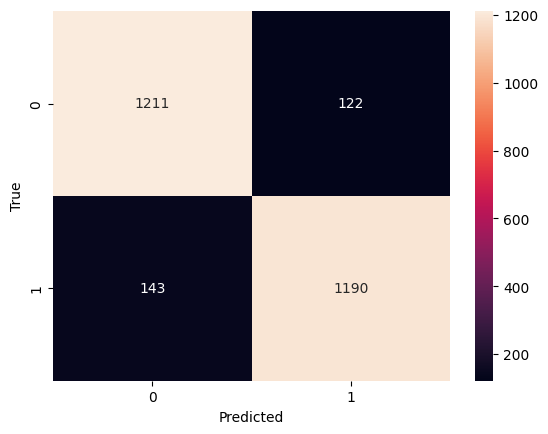

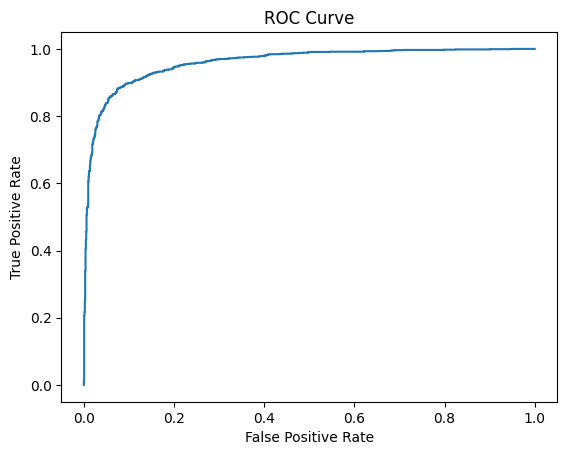

In [ ]:
# CountVectorizer ile Naive Bayes
# cross_val_score ile çapraz doğrulama yapma
cv_scores = cross_val_score(naive_bayes_count, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

# Test verisi üzerinde tahmin yapma ve sınıflandırma raporu oluşturma
result = naive_bayes_count.predict(X_test)
cr = classification_report(y_test, result)
print(cr)

# Modelin tahminlerini alın
y_pred = naive_bayes_count.predict(X_test)
y_pred_proba = naive_bayes_count.predict_proba(X_test)

# Eğitim ve test doğruluklarını yazdırma
print('Train Accuracy : %.3f' % naive_bayes_count.score(X_train, y_train))
print('Test Accuracy : %.3f' % naive_bayes_count.score(X_test, y_test))

# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

# Precision, Recall ve F1 skorlarını hesaplama ve yazdırma
y_pred = naive_bayes_count.predict(X_test)
print("precision score:", precision_score(y_test, y_pred, average='macro'))
print(" recall score",recall_score(y_test, y_pred, average='macro'))
print(" f1 score",f1_score(y_test, y_pred, average='macro'))

# Hata matrisini çizme
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve çizimi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer ile Naive Bayes modeli için bir Pipeline oluşturma
naive_bayes_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

# Naive Bayes modelini oluşturma ve eğitme
naive_bayes_tfidf.fit(X_train, y_train)




Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

CV average score: 0.89
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1333
           1       0.90      0.89      0.90      1333

    accuracy                           0.90      2666
   macro avg       0.90      0.90      0.90      2666
weighted avg       0.90      0.90      0.90      2666

Train Accuracy : 0.970
Test Accuracy : 0.898
Sensitivity: 0.8942235558889723
Specificity: 0.9009752438109527
ROC AUC Score: 0.9607910229620421
precision score: 0.897617525360084
recall score: 0.8975993998499625
f1 score: 0.8975982328464047


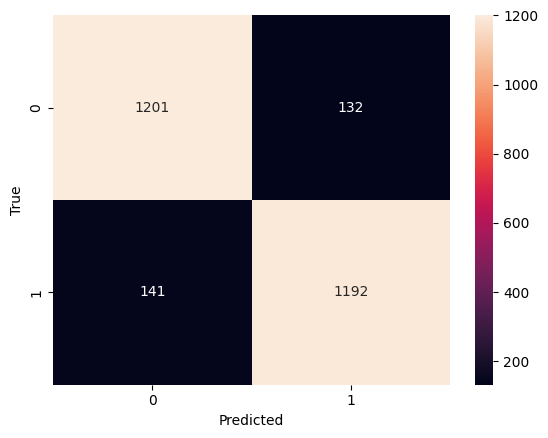

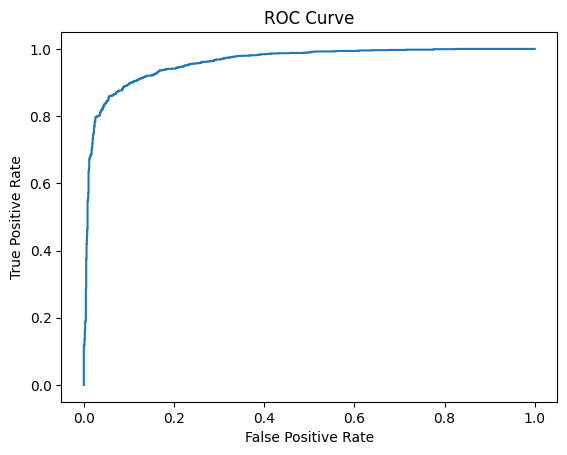

In [ ]:
# TfidfVectorizer ile Naive Bayes
# cross_val_score ile çapraz doğrulama yapma
cv_scores = cross_val_score(naive_bayes_tfidf, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

# Test verisi üzerinde tahmin yapma ve sınıflandırma raporu oluşturma
result = naive_bayes_tfidf.predict(X_test)
cr = classification_report(y_test, result)
print(cr)

# Modelin tahminlerini alın
y_pred_proba = naive_bayes_tfidf.predict_proba(X_test)

# Eğitim ve test doğruluklarını yazdırma
print('Train Accuracy : %.3f' % naive_bayes_tfidf.score(X_train, y_train))
print('Test Accuracy : %.3f' % naive_bayes_tfidf.score(X_test, y_test))

# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

# Precision, Recall ve F1 skorlarını hesaplama ve yazdırma
print("precision score:", precision_score(y_test, result, average='macro'))
print("recall score:", recall_score(y_test, result, average='macro'))
print("f1 score:", f1_score(y_test, result, average='macro'))

# Hata matrisini çizme
sns.heatmap(confusion_matrix(y_test, result), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve çizimi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:

# TfidfVectorizer ile SVC modeli için bir Pipeline oluşturma
svm_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(probability=True))])

# Modeli eğitme
svm_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC(probability=True))])

CV average score: 0.89
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1333
           1       0.91      0.89      0.90      1333

    accuracy                           0.90      2666
   macro avg       0.90      0.90      0.90      2666
weighted avg       0.90      0.90      0.90      2666

Train Accuracy : 0.995
Test Accuracy : 0.897
Sensitivity: 0.8859714928732183
Specificity: 0.9077269317329333
ROC AUC Score: 0.9552704192552265
precision score: 0.8970371296271272
recall score: 0.8968492123030758
f1 score: 0.8968370055644556


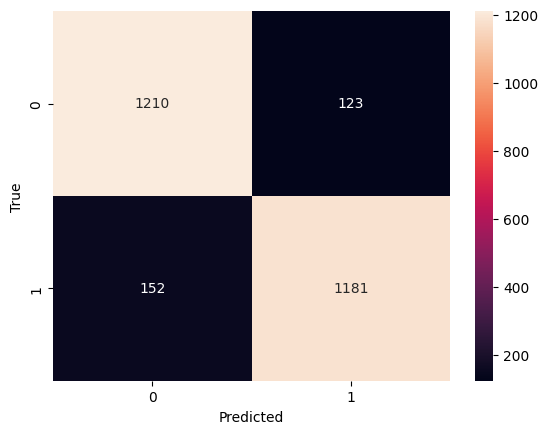

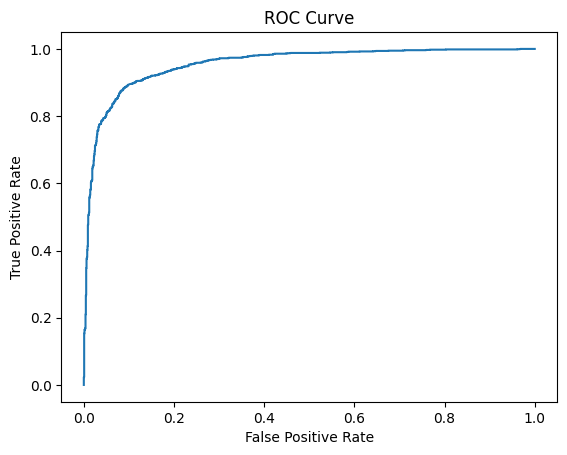

In [ ]:
# cross_val_score ile çapraz doğrulama yapma
cv_scores = cross_val_score(svm_tfidf, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

# Test verisi üzerinde tahmin yapma ve sınıflandırma raporu oluşturma
result = svm_tfidf.predict(X_test)
cr = classification_report(y_test, result)
print(cr)

# Eğitim ve test doğruluklarını yazdırma
print('Train Accuracy : %.3f' % svm_tfidf.score(X_train, y_train))
print('Test Accuracy : %.3f' % svm_tfidf.score(X_test, y_test))

# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

# Precision, Recall ve F1 skorlarını hesaplama ve yazdırma
print("precision score:", precision_score(y_test, result, average='macro'))
print("recall score:", recall_score(y_test, result, average='macro'))
print("f1 score:", f1_score(y_test, result, average='macro'))

# Hata matrisini çizme
sns.heatmap(confusion_matrix(y_test, result), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve çizimi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# CountVectorizer ile SVC
# CountVectorizer ile SVC modeli için bir Pipeline oluşturma
svm_countvec = Pipeline([('count_vect', CountVectorizer()), ('clf', SVC())])

# Modeli eğitme
svm_countvec.fit(X_train, y_train)

Pipeline(steps=[('count_vect', CountVectorizer()), ('clf', SVC())])

CV average score: 0.88
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1333
           1       0.89      0.86      0.88      1333

    accuracy                           0.88      2666
   macro avg       0.88      0.88      0.88      2666
weighted avg       0.88      0.88      0.88      2666

Train Accuracy : 0.978
Test Accuracy : 0.878
Sensitivity: 0.8642160540135033
Specificity: 0.8927231807951987
ROC AUC Score: 0.9552704192552265
precision score: 0.8787774332632101
recall score: 0.878469617404351
f1 score: 0.8784449217800113


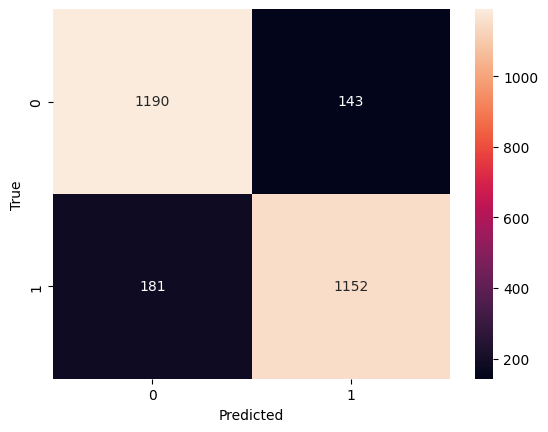

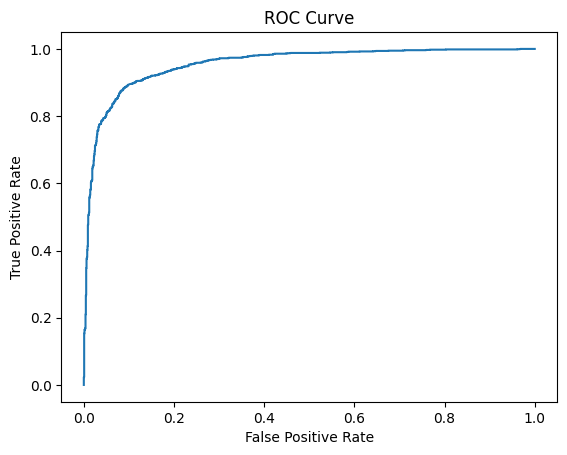

In [ ]:
#CountVectorizer ile SVC
# cross_val_score ile çapraz doğrulama yapma
cv_scores = cross_val_score(svm_countvec, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

# Test verisi üzerinde tahmin yapma ve sınıflandırma raporu oluşturma
result = svm_countvec.predict(X_test)
cr = classification_report(y_test, result)
print(cr)

# Eğitim ve test doğruluklarını yazdırma
print('Train Accuracy : %.3f' % svm_countvec.score(X_train, y_train))
print('Test Accuracy : %.3f' % svm_countvec.score(X_test, y_test))

# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

# Precision, Recall ve F1 skorlarını hesaplama ve yazdırma
y_pred = svm_countvec.predict(X_test)
print("precision score:", precision_score(y_test, result, average='macro'))
print("recall score:", recall_score(y_test, result, average='macro'))
print("f1 score:", f1_score(y_test, result, average='macro'))

# Hata matrisini çizme
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve çizimi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
!pip install requests
!pip install html5lib
!pip install bs4

farkli bir film sitesinden yorumlari cekerek pozitivmi negativmi yuzde kac pozitiv negativ oldugunu modelimiz nasil tahmin etmis bunu gormek istiyoruz bunu icin web screping yapicam
web sitesinin urlsini kopyalayip yapisdiricam bununla istek atiyorum ve sayfanin aslina html kodunu cekmis oliyoruz bunun icinde DİV "class":"card-body text-white olanlari cekiyorum

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

URL = "https://www.hdfilmcehennemi.life/where-the-crawdads-sing-285/"
r = requests.get(URL)

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup)
quotes=[]  # a list to store quotes

text=soup.find("div",{"class":"card-body text-white"})

text2=text.find_all("p",{"class":"text-justify comment-text text-break mb-2 text-white-50"})
#print(text2)

comment_list=[]
for i in text2:
  comment_list.append(i.text)
# text2_2=text.find_all("ul")
print(comment_list[0])

Kitabını bir kaç ay önce okumuştum. Kitabını o kadar çok beğenmiştim ki hissettirdiği duygu, o yalnızlık hissi içime işlemişti. Filmini izlemeye başladığımda her şeyden öte ağzımı açık bırakıp beni etkileyen; kitabını okurken kafamda canlandırdığım her şey filmdekilerle bire bir aynıydı bu beni biraz duygulandırdı. Film o kadar içinize işliyor ki üstelik kitabını okuyup izleyince duygulanmamak insanın elinde olmuyor.


In [ ]:
# Tahminlerin yapılması ve olasılıkların hesaplanması
positive_count = 0
negative_count = 0

for i in range(len(comment_list)):
    prediction = naive_bayes_count.predict([comment_list[i]])
    proportion = naive_bayes_count.predict_proba([comment_list[i]])

    if prediction[0] == 1:
        positive_count += 1
        print(comment_list[i], " is: ", proportion[0][1], " Positive")
    else:
        negative_count += 1
        print(comment_list[i], " is: ", proportion[0][0], " Negative")

# Toplam yorum sayısını yazdırma
total_comments = positive_count + negative_count
print("Toplam yorum sayısı:", total_comments)
print("Pozitif yorum sayısı:", positive_count)
print("Negatif yorum sayısı:", negative_count)

Kitabını bir kaç ay önce okumuştum. Kitabını o kadar çok beğenmiştim ki hissettirdiği duygu, o yalnızlık hissi içime işlemişti. Filmini izlemeye başladığımda her şeyden öte ağzımı açık bırakıp beni etkileyen; kitabını okurken kafamda canlandırdığım her şey filmdekilerle bire bir aynıydı bu beni biraz duygulandırdı. Film o kadar içinize işliyor ki üstelik kitabını okuyup izleyince duygulanmamak insanın elinde olmuyor.  is:  0.9503899841479404  Negative
yoruma gerek yok..10/10  is:  0.6802184068519266  Positive
Yorumlara şöyle bir baktım da film bittikten sonra ; herkeste farklı bir tat bırakmış. Ben çok beğendim filmi ,aktı gitti izlerken hiç sıkılmadım. Eski zamanları hatırlattı bana ,doğallığı ,masumiyeti ,iyi niyeti . Duygusal bir filmdi bana göre .Sıkıcı değildi, öyle aksiyon, ters köşe falan yok  ama izlettiriyor kendini, böyle kendi halinde ,naif bir flmdi.  is:  0.9457561030735913  Positive
5/10 izlerken ara ara ilerlettim  is:  0.5033821749572517  Negative
Nefis bir film. Kaçmaz

In [ ]:
# Tahminlerin yapılması ve olasılıkların hesaplanması
positive_count = 0
negative_count = 0

for i in range(len(comment_list)):
    prediction = naive_bayes_tfidf.predict([comment_list[i]])

    if prediction[0] == 1:
        positive_count += 1
    else:
        negative_count += 1

# Toplam yorum sayısını, pozitif ve negatif yorum sayılarını yazdırma
total_comments = positive_count + negative_count
print("Toplam yorum sayısı:", total_comments)
print("Pozitif yorum sayısı:", positive_count)
print("Negatif yorum sayısı:", negative_count)


Toplam yorum sayısı: 31
Pozitif yorum sayısı: 24
Negatif yorum sayısı: 7


In [ ]:
# Tahminlerin yapılması ve olasılıkların hesaplanması
positive_count = 0
negative_count = 0

for i in range(len(comment_list)):
    prediction = svm_tfidf.predict([comment_list[i]])

    if prediction[0] == 1:
        positive_count += 1
    else:
        negative_count += 1

# Toplam yorum sayısını, pozitif ve negatif yorum sayılarını yazdırma
total_comments = positive_count + negative_count
print("Toplam yorum sayısı:", total_comments)
print("Pozitif yorum sayısı:", positive_count)
print("Negatif yorum sayısı:", negative_count)


Toplam yorum sayısı: 31
Pozitif yorum sayısı: 22
Negatif yorum sayısı: 9


In [ ]:
# Tahminlerin yapılması ve olasılıkların hesaplanması
positive_count = 0
negative_count = 0

for i in range(len(comment_list)):
    prediction = svm_countvec.predict([comment_list[i]])

    if prediction[0] == 1:
        positive_count += 1
    else:
        negative_count += 1

# Toplam yorum sayısını, pozitif ve negatif yorum sayılarını yazdırma
total_comments = positive_count + negative_count
print("Toplam yorum sayısı:", total_comments)
print("Pozitif yorum sayısı:", positive_count)
print("Negatif yorum sayısı:", negative_count)

Toplam yorum sayısı: 31
Pozitif yorum sayısı: 17
Negatif yorum sayısı: 14
